 #### Procesamiento Digital de Señales

# Trabajo Práctico Nº1
#### Tomas Ambrogi


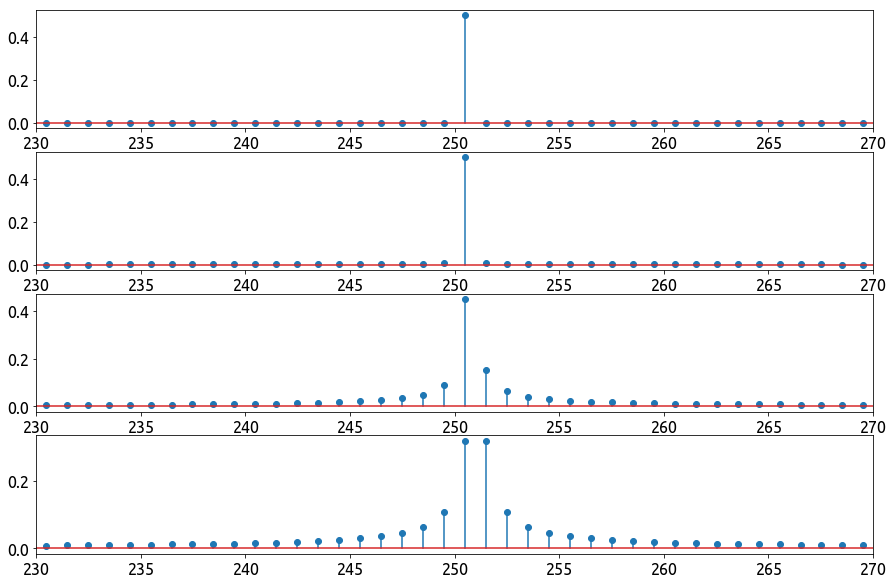

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,0.5,1.01162e-14,0.25
$f_S/4+0.01$,0.499917,0.00505069,0.250081
$f_S/4+0.25$,0.449805,0.150406,0.297176
$f_S/4+0.5$,0.318309,0.318312,0.398679


In [9]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (15,10)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################
from pandas import DataFrame
from IPython.display import HTML
from matplotlib.pyplot import figure
#import matplotlib.pyplot as plt
from generadores import generador_senoidal
N = 1000
fs = 1000
fo = fs/4
fd = [0,0.01,0.25,0.5]

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

ff = np.linspace(0, (N/2)*df, N/2).flatten()

[tt, s0] = generador_senoidal(fs, fo + fd[0], N)
[tt, s1] = generador_senoidal(fs, fo + fd[1], N)
[tt, s2] = generador_senoidal(fs, fo + fd[2], N)
[tt, s3] = generador_senoidal(fs, fo + fd[3], N)

S0 = np.fft.fft(s0) / N
S1 = np.fft.fft(s1) / N
S2 = np.fft.fft(s2) / N
S3 = np.fft.fft(s3) / N
M0 = (fo + fd[0]) * N / fs
M1 = (fo + fd[1]) * N / fs
M2 = (fo + fd[2]) * N / fs
M3 = (fo + fd[3]) * N / fs


plt.subplot(411)
plt.xlim(230,270)
plt.stem(ff, np.abs(S0[:int(N/2)]))
plt.subplot(412)
plt.xlim(230,270)
plt.stem(ff, np.abs(S1[:int(N/2)]))
plt.subplot(413)
plt.xlim(230,270)
plt.stem(ff, np.abs(S2[:int(N/2)]))
plt.subplot(414)
plt.xlim(230,270)
plt.stem(ff, np.abs(S3[:int(N/2)]))
plt.show()



tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  ['', '', ''], # <-- acá debería haber numeritos :)
                  ['', '', ''], # <-- acá debería haber numeritos :)
                  ['', '', ''], # <-- acá debería haber numeritos :)
                  ['', '', '']  # <-- acá debería haber numeritos :)
                 ]


tus_resultados[2][0] = np.abs(S0[int(M0)])
tus_resultados[3][0] = np.abs(S1[int(M1)])
tus_resultados[4][0] = np.abs(S2[int(M2)])
tus_resultados[5][0] = np.abs(S3[int(M3)])

tus_resultados[2][1] = np.abs(S0[int(M0 + 1)])
tus_resultados[3][1] = np.abs(S1[int(M1 + 1)])
tus_resultados[4][1] = np.abs(S2[int(M2 + 1)])
tus_resultados[5][1] = np.abs(S3[int(M3 + 1)])


aux = 0

for x in range(int(N)):
    if x != int(M0):
        aux += np.power(np.abs(S0[int(x)]), 2)
tus_resultados[2][2] = aux

aux = 0

for x in range(int(N)):
    if x != int(M1):
        aux += np.power(np.abs(S1[int(x)]), 2)
tus_resultados[3][2] = aux

aux = 0

for x in range(int(N)):
    if x != int(M2):
        aux += np.power(np.abs(S2[int(x)]), 2)
tus_resultados[4][2] = aux

aux = 0

for x in range(int(N)):
    if x != int(M3):
        aux += np.power(np.abs(S3[int(x)]), 2)
tus_resultados[5][2] = aux
    
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

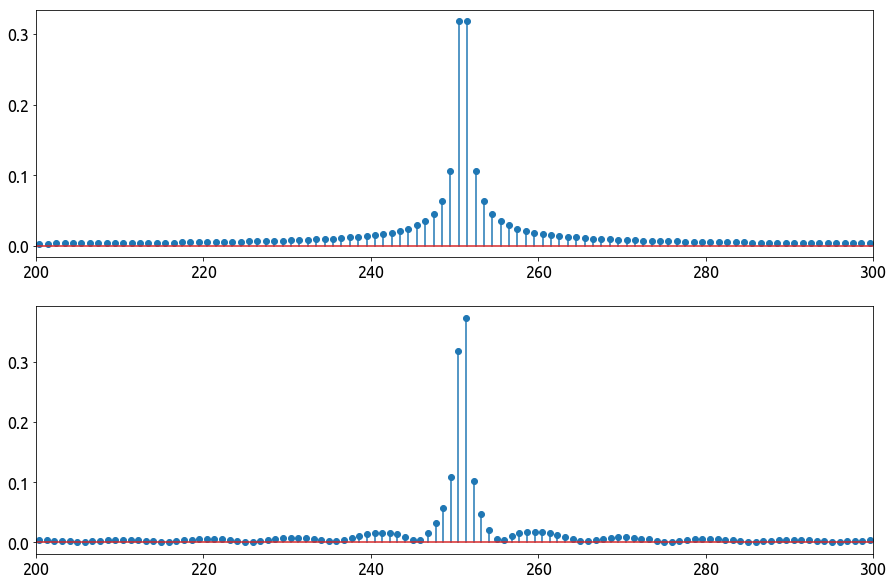

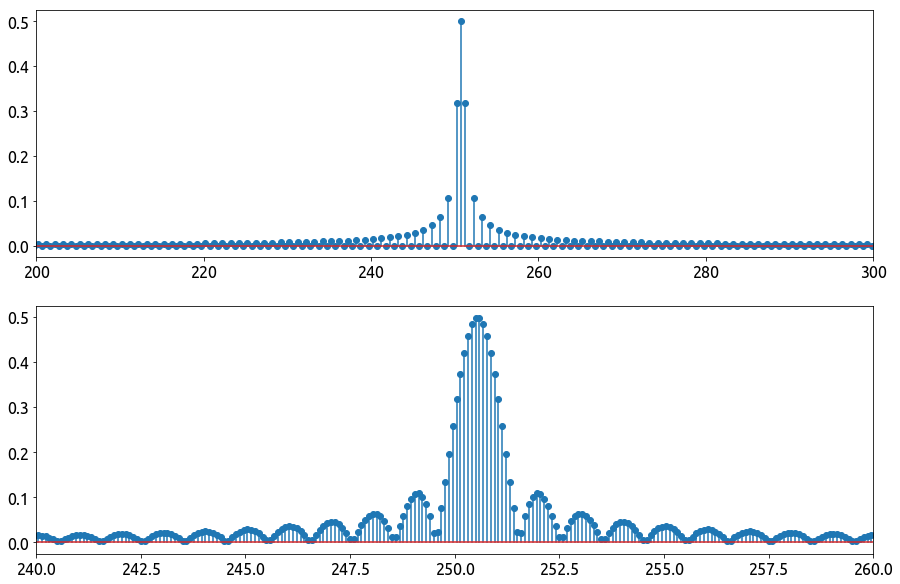

In [10]:
Mj = [int(N/10), N, 10*N]

plt.subplot(211)
plt.xlim(200,300)
plt.stem(ff, np.abs(S3[:int(N/2)]))
#plt.show()

N_pad0 = int(N + Mj[0])
ff_pad0 = np.linspace(0, int((N_pad0/2)*fs/N_pad0), N_pad0/2).flatten()
s3_pad0 = np.pad(s3, int(Mj[0]/2), 'constant')
S3_pad0 = np.fft.fft(s3_pad0) / N

plt.subplot(212)
plt.xlim(200,300)
plt.stem(ff_pad0, np.abs(S3_pad0[:int(N_pad0/2)]))
plt.show()


N_pad1 = N + Mj[1]
ff_pad1 = np.linspace(0, int((N_pad1/2)*fs/N_pad1), N_pad1/2).flatten()
s3_pad1 = np.pad(s3, int(Mj[1]/2), 'constant')
S3_pad1 = np.fft.fft(s3_pad1) / N

plt.subplot(211)
plt.xlim(200,300)
plt.stem(ff_pad1, np.abs(S3_pad1[:int(N_pad1/2)]))
#plt.show()


N_pad2 = N + Mj[2]
ff_pad2 = np.linspace(0, int((N_pad2/2)*fs/N_pad2), N_pad2/2).flatten()
s3_pad2 = np.pad(s3, int(Mj[2]/2), 'constant')
S3_pad2 = np.fft.fft(s3_pad2) / N

plt.subplot(212)
plt.xlim(240,260)
plt.stem(ff_pad2, np.abs(S3_pad2[:int(N_pad2/2)]))
plt.show()


M0 = (fo + 0.5) * N_pad0 / fs
M1 = (fo + 0.5) * N_pad1 / fs
M2 = (fo + 0.5) * N_pad2 / fs



Dado que modificamos la cantidad de muestras <em>N</em> de la señal sin modificar nuestra frecuencia de muestreo <em>$f_s$</em>, la resolucion espectral cambia.

## Calculo Porcentual

In [11]:
Max = 0
for x in range(int(N/2)):
    if np.abs(S3[x]) > Max:
        y = x
        Max = np.abs(S3[x])

M = (fo + fd[3]) * N / fs


Max0 = 0
for x in range(int(N_pad0/2)):
    if np.abs(S3_pad0[x]) > Max0:
        x_0 = x
        Max0 = np.abs(S3_pad0[x])


Max1 = 0
for x in range(int(N_pad1/2)):
    if np.abs(S3_pad1[x]) > Max1:
        x_1 = x
        Max1 = np.abs(S3_pad1[x])
        

Max2 = 0
for x in range(int(N_pad2/2)):
    if np.abs(S3_pad2[x]) > Max2:
        x_2 = x
        Max2 = np.abs(S3_pad2[x])
        
#print("Maximos en: ", y, x_0, x_1, x_2)
#print("Deberian estar en: ", M, M0, M1, M2)

tus_resultados = ['', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '' # <-- acá debería haber numeritos :)
                 ]



tus_resultados[0] = np.abs((y - M)/M)*100
tus_resultados[1] = np.abs((x_0 - M0)/M0)*100
tus_resultados[2] = np.abs((x_1 - M1)/M1)*100
tus_resultados[3] = (np.abs(x_2 - M2)/M2)*100


df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())

,$e_\%$
0,0.199601
$N/10$,0.163310
$N$,0.000000
$10N$,0.018146
